In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom, beta
import preliz as pz

In [2]:
az.style.use("arviz-whitegrid")
plt.rc('figure', dpi=150)

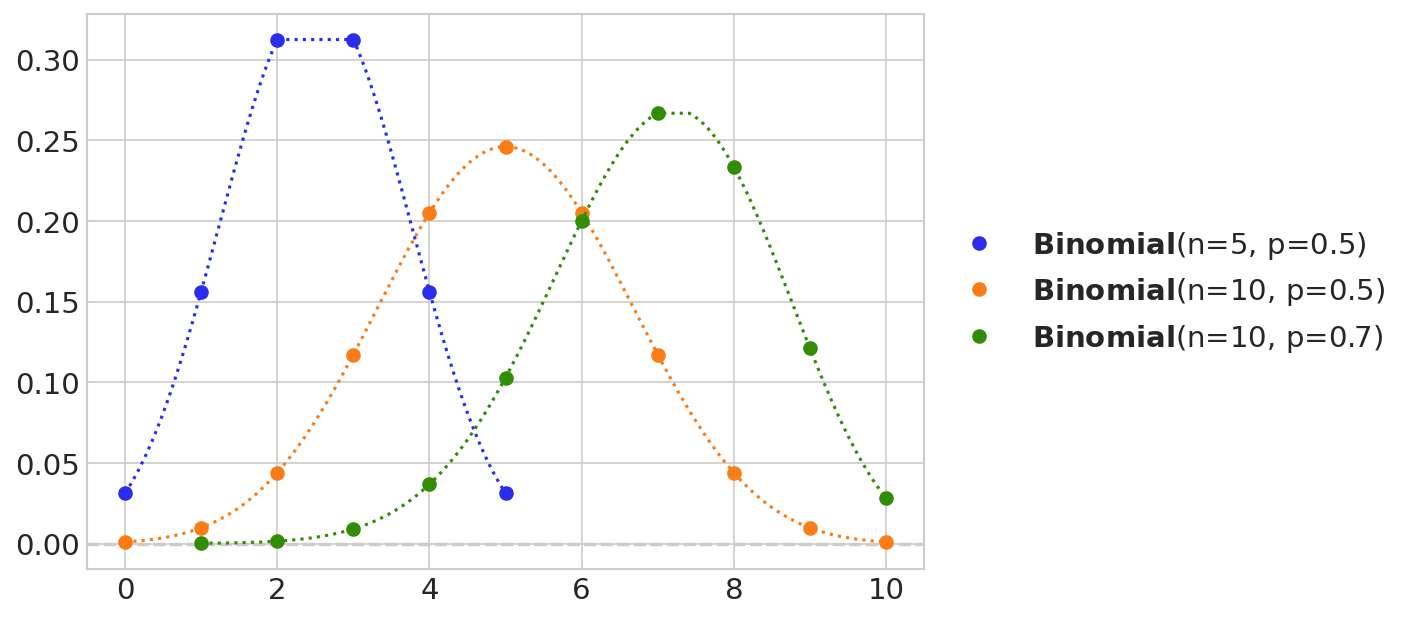

In [4]:
ns = [5, 10, 10]
ps = [0.5, 0.5, 0.7]
for n, p in zip(ns, ps):
    pz.Binomial(n, p).plot_pdf()

In [4]:
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_interactive(pointinterval=False)

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…

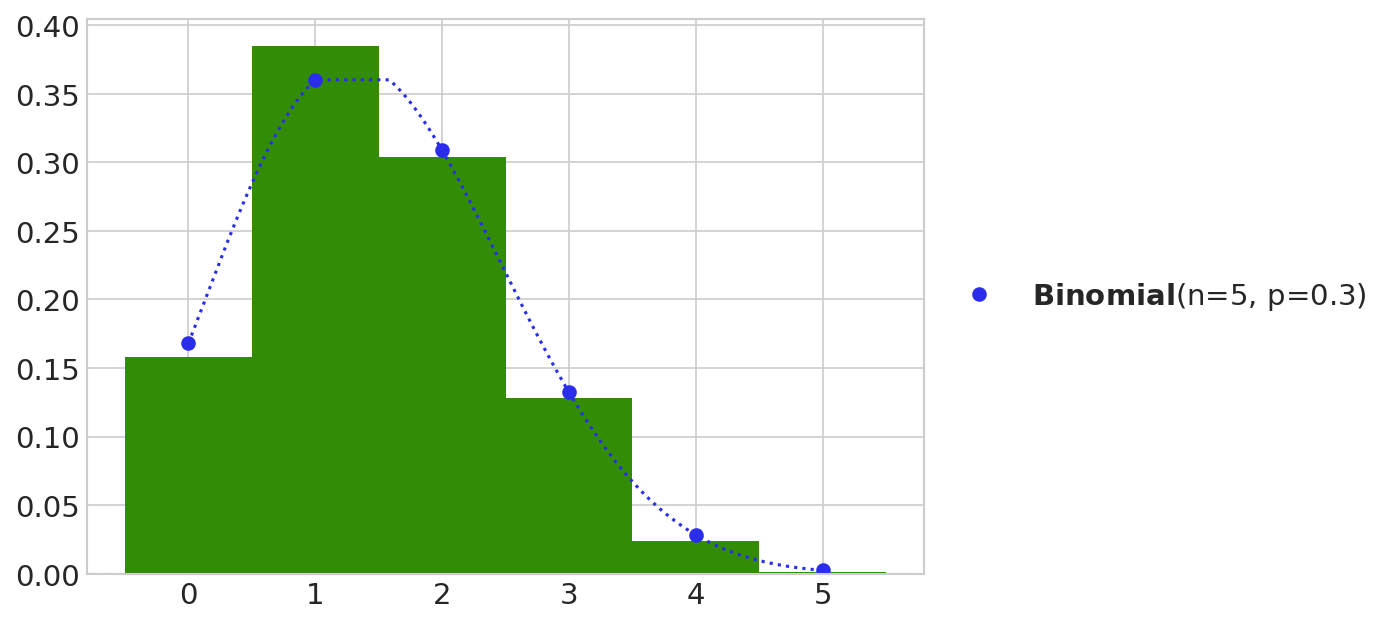

In [5]:
plt.hist(pz.Binomial(p=0.3, n=5).rvs(1000),
         bins=[0, 1, 2, 3, 4, 5, 6], density=True, align="left", color="C2")
pz.Binomial(p=0.3, n=5).plot_pdf();

[None, None, None]

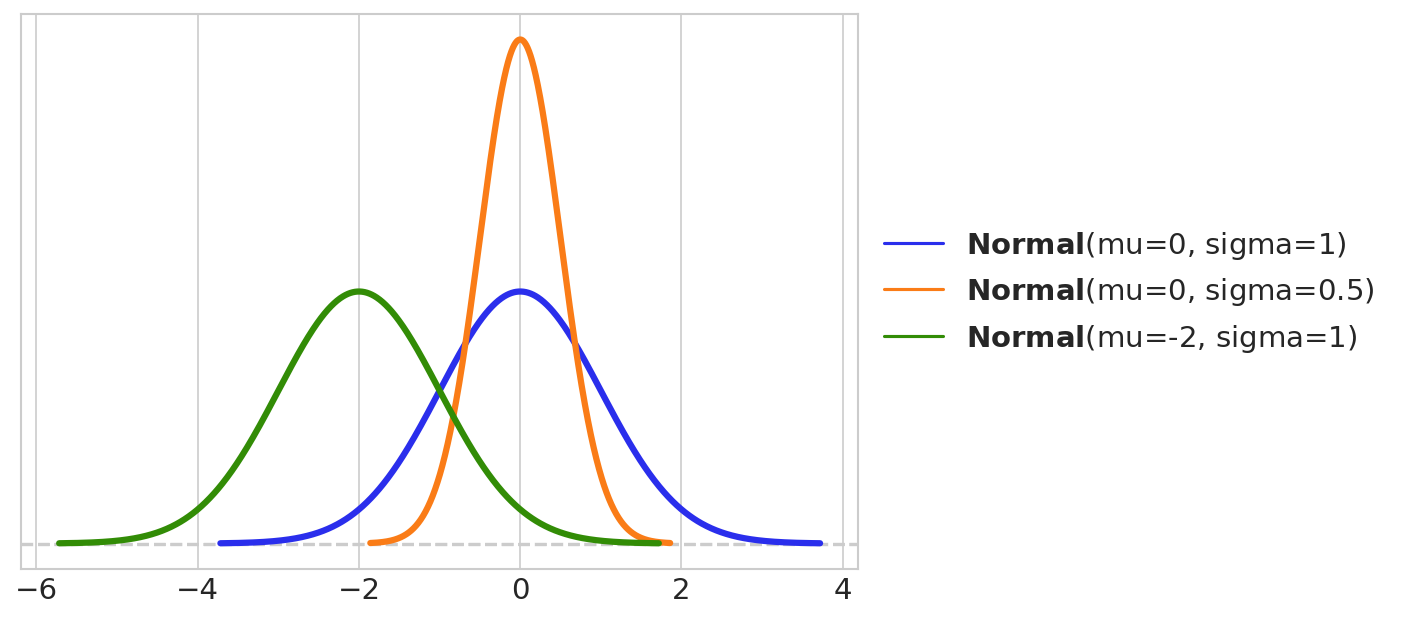

In [6]:
mus = [0., 0., -2.]
sigmas = [1, 0.5, 1]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_pdf()

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]

0.47724993761274365

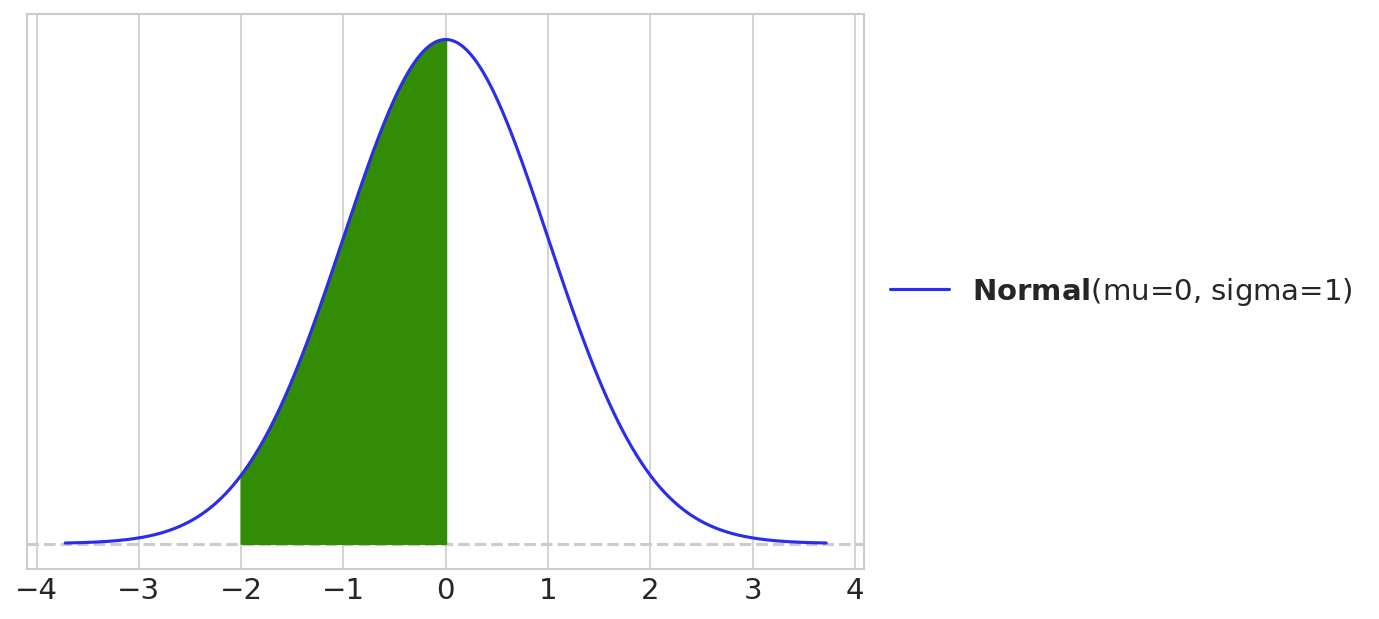

In [6]:
dist = pz.Normal(0, 1)
ax = dist.plot_pdf()
x_s = np.linspace(-2, 0)
ax.fill_between(x_s, dist.pdf(x_s), color="C2")
dist.cdf(0) - dist.cdf(-2)

<Axes: >

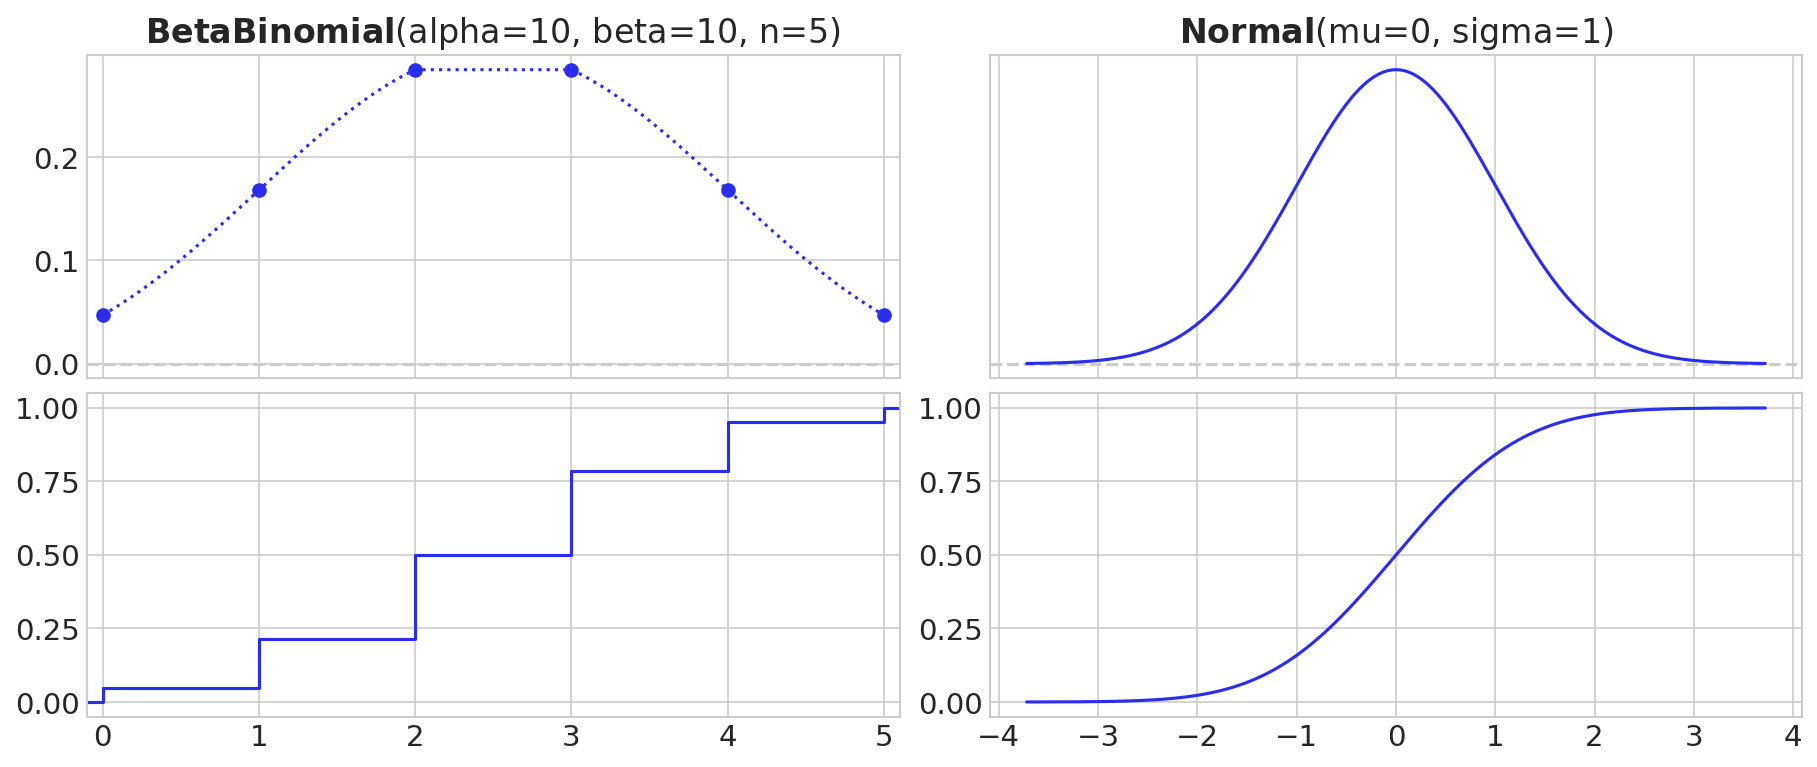

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(12, 5), sharex="col")
pz.BetaBinomial(p=0.3, n=5).plot_pdf(ax=ax[0, 0], legend="title")
pz.BetaBinomial(p=0.3, n=5).plot_cdf(ax=ax[1, 0], legend=None)
pz.Normal(0, 1).plot_pdf(ax=ax[0, 1], legend="title")
pz.Normal(0, 1).plot_cdf(ax=ax[1, 1], legend=None)

Text(0, 0.5, 'Density')

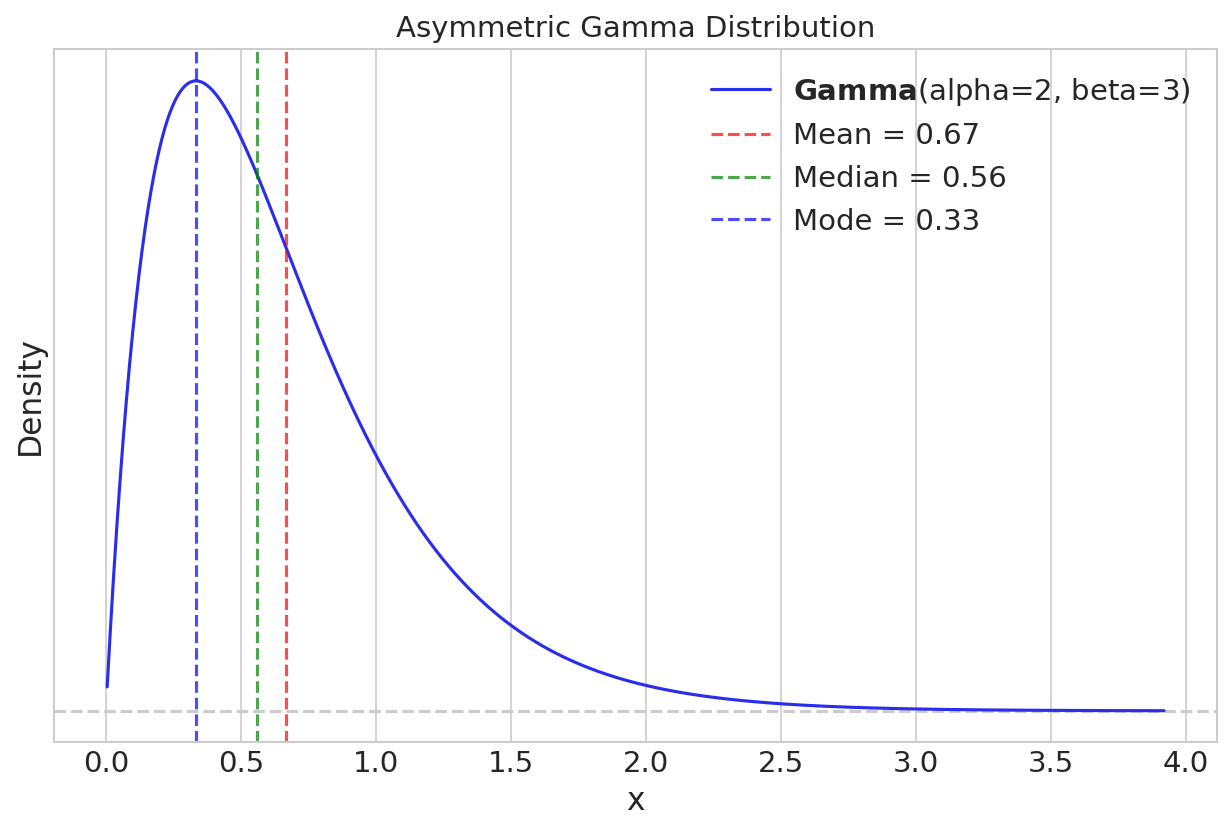

In [11]:
# Create an asymmetric gamma distribution
alpha = 2  # shape parameter
beta = 3  # scale parameter

# Create the distribution using preliz
gamma_dist = pz.Gamma(alpha=alpha, beta=beta)

# Calculate mean, median, and mode
mean = gamma_dist.mean()  # Mean of gamma distribution
median = gamma_dist.median()  # Preliz can calculate this directly
mode = gamma_dist.mode()  # Mode formula for gamma

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
gamma_dist.plot_pdf(ax=ax)

# Add vertical lines for mean, median and mode
x_range = np.linspace(0, 20, 1000)
y_max = gamma_dist.pdf(x_range).max()

ax.axvline(mean, color='red', linestyle='--', alpha=0.7, label=f'Mean = {mean:.2f}')
ax.axvline(median, color='green', linestyle='--', alpha=0.7, label=f'Median = {median:.2f}')
ax.axvline(mode, color='blue', linestyle='--', alpha=0.7, label=f'Mode = {mode:.2f}')

# Add a title and legend
ax.set_title('Asymmetric Gamma Distribution', fontsize=14)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Density')

<Axes: title={'center': '$\\bf{StudentT}$(nu=3, mu=0, sigma=1)\nμ=0, σ=1.73, γ=nan, κ=inf'}>

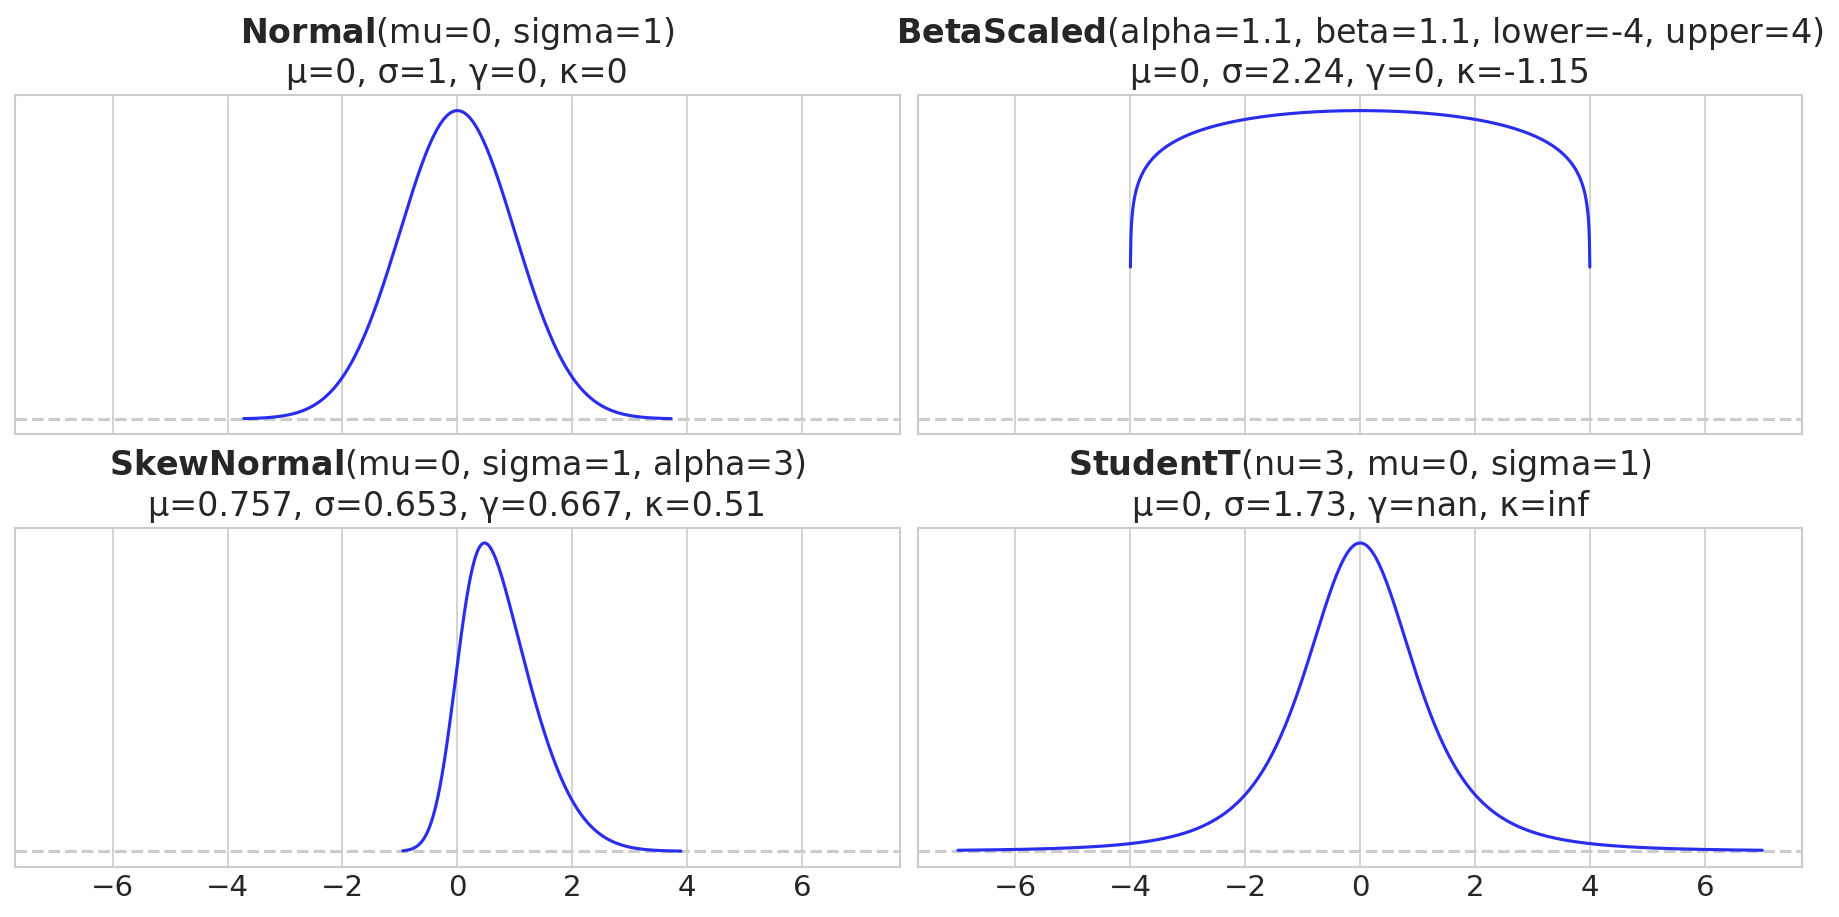

In [12]:
_, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
pz.Normal(0, 1).plot_pdf(ax=ax[0, 0], moments=["m", "d", "s", "k"], legend="title")
pz.BetaScaled(1.1, 1.1, -4, 4).plot_pdf(ax=ax[0, 1], moments=["m", "d", "s", "k"], legend="title")
pz.SkewNormal(0, 1, 3).plot_pdf(ax=ax[1, 0], moments=["m", "d", "s", "k"], legend="title")
pz.StudentT(3, 0, 1).plot_pdf(ax=ax[1, 1], moments=["m", "d", "s", "k"], legend="title", support=(-7, 7))

Text(1, -2, ' ... $p(A \\mid B)$')

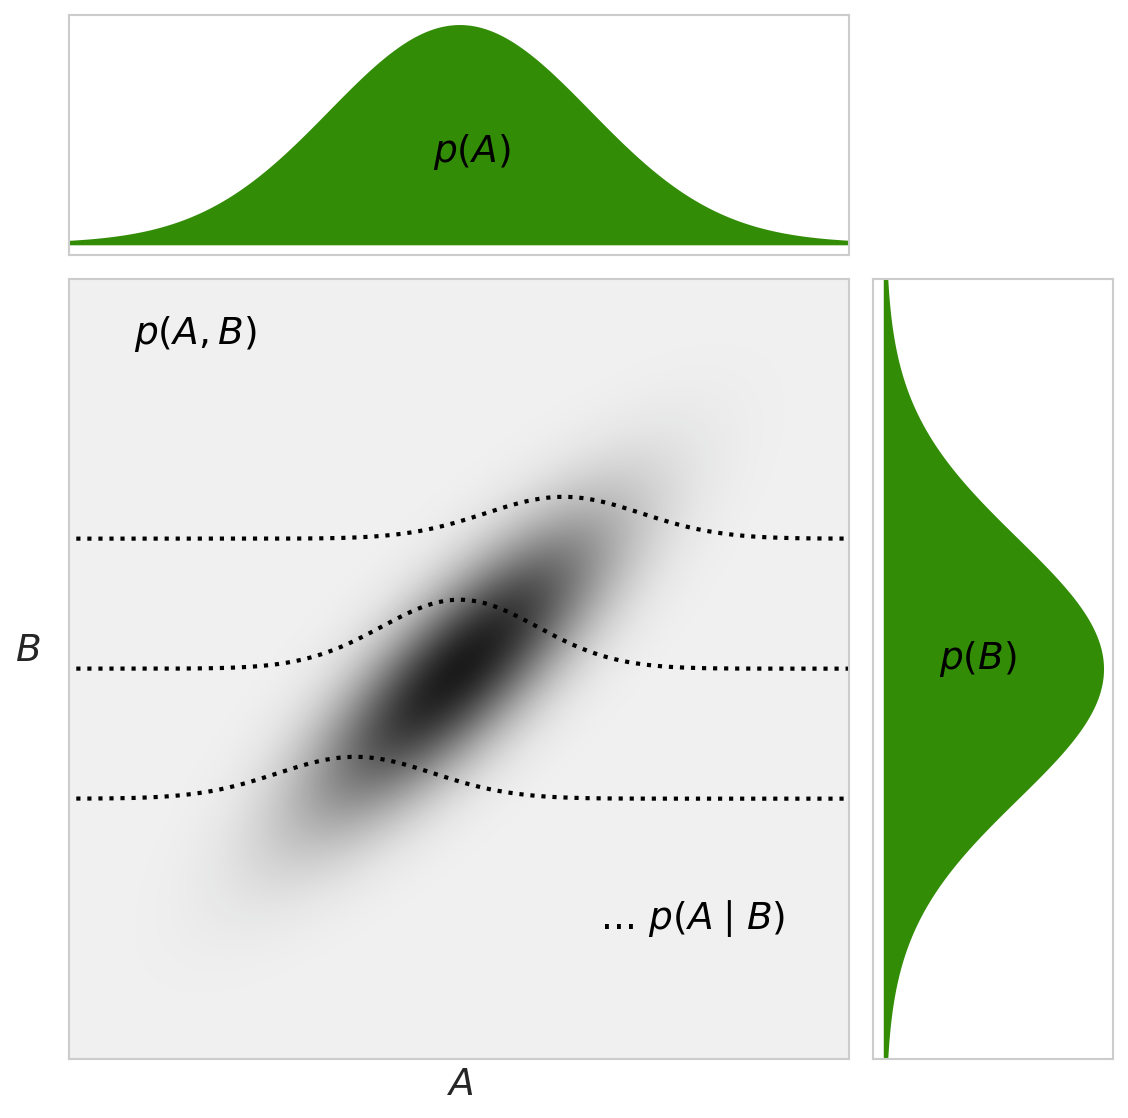

In [14]:
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = pz.MvNormal([0, 0], [[1, 0.8], 
                          [0.8, 1]])

x_value = pos[:, :, 0][:,0]
x_density = rv.pdf(pos)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]


_, axes_arr = plt.subplots(1, 3, figsize=(8, 8))

ax_joint, ax_x, ax_y = axes_arr
ax_joint.set_position(rect_scatter)
ax_x.set_position(rect_histx)
ax_y.set_position(rect_histy)

ax_joint.imshow(x_density, cmap='cet_gray_r', origin='lower', extent=[-3, 3, -3, 3])

ax_joint.plot(x_value, x_density[400]*2, 'k:', lw=2)
ax_joint.plot(x_value, x_density[500]*2+1, 'k:', lw=2)
ax_joint.plot(x_value, x_density[300]*2-1, 'k:', lw=2)

ax_x.fill_between(x_value, x_density.sum(1), color='C2')
ax_y.fill_betweenx(x_value, x_density.sum(1), color='C2')


for ax in [ax_joint, ax_x, ax_y]:
    ax.grid(False)
    ax.set_facecolor('w')
    ax.set_xticks([])
    ax.set_yticks([])
ax_joint.set_xlim(-3, 3)
ax_joint.set_ylim(-3, 3)
ax_x.set_xlim(-3, 3)
ax_y.set_ylim(-3, 3)
ax_x.set_xlim(-3, 3)
ax_joint.set_ylabel('$B$', rotation=0, labelpad=20, fontsize=18)
ax_joint.set_xlabel('$A$', fontsize=18)

ax_joint.text(-2.5, 2.5, '$p(A, B)$', fontsize=18, color='k', weight='medium')
ax_y.text(10, 0, '$p(B)$', fontsize=18, color='k', weight='medium')
ax_x.text(-0.2, 15, '$p(A)$', fontsize=18, color='k', weight='medium')
ax_joint.text(1, -2, ' ... $p(A \mid B)$', fontsize=18, color='k', weight='medium')